In [1]:
# Students Performance in Exams
    
# How effective is the test preparation course?
# Which major factors contribute to test outcomes?
# What would be the best way to improve student scores on each test?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## Upload Data

In [3]:
# Read the csv file and store it in data frame
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
# Show first 10 rows
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
# number of rows in the dataframe
len(df)

1000

In [6]:
# shape of df (rows, columns)
df.shape

(1000, 8)

In [8]:
# renaming the columns for convenience
df = df.rename(columns={'math score':'math_score','race/ethnicity':'race_ethnicity',
                       'writing score':'writing_score','reading score':'reading_score'})

# Calculate the percentage of total score by adding all 3 subjects(math, reading and writing)
df["percentage"] = round((df["math_score"] + df["reading_score"] + df["writing_score"])/300*100)
df.sort_values(by=['percentage'],ascending=False)
df.head()

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


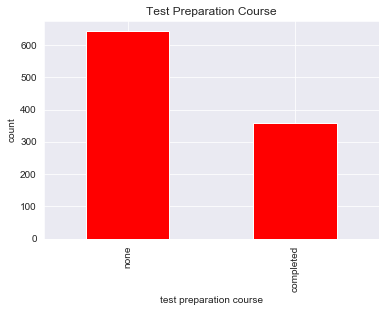

In [54]:
# This will show how many students took test preparation course
df['test preparation course'].value_counts(normalize = True)
df['test preparation course'].value_counts().plot.bar(color = 'red')
plt.title('Test Preparation Course')
plt.xlabel('test preparation course')
plt.ylabel('count')
plt.show()

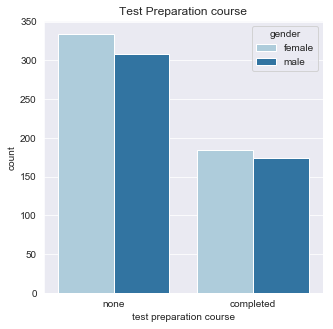

In [10]:
# This will show how many female and male students took the test preparation course 
# test prep course
plt.figure(figsize=(5,5))
plt.title('Test Preparation course')
sns.countplot(df['test preparation course'], palette='Paired', hue=df['gender'])

In [11]:
# Assign the grades based on percantage of students 
# students receiving less than 60% are considered 'Failed'
def assign_grades(percent):
    if percent >= 95 and percent <= 100:
        return 'A'
    elif percent >= 90 and percent <= 94.99:
        return 'A-'
    elif percent >= 85 and percent <= 89.99:
        return 'B'
    elif percent >= 80 and percent <= 84.99:
        return 'B-'
    elif percent >= 75 and percent <= 79.99:
        return 'C'
    elif percent >= 70 and percent <= 74.99:
        return 'C-'
    elif percent >= 65 and percent <= 69.99:
        return 'D'
    elif percent >= 60 and percent <= 64.99:
        return 'D-'
    elif percent <= 59.99:
        return 'F'
    else:
        return ''
    
# Add another column with 'grades'
df['grades'] = df['percentage'].apply(assign_grades)
df.head()

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,percentage,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,C-
1,female,group C,some college,standard,completed,69,90,88,82.0,B-
2,female,group B,master's degree,standard,none,90,95,93,93.0,A-
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,F
4,male,group C,some college,standard,none,76,78,75,76.0,C


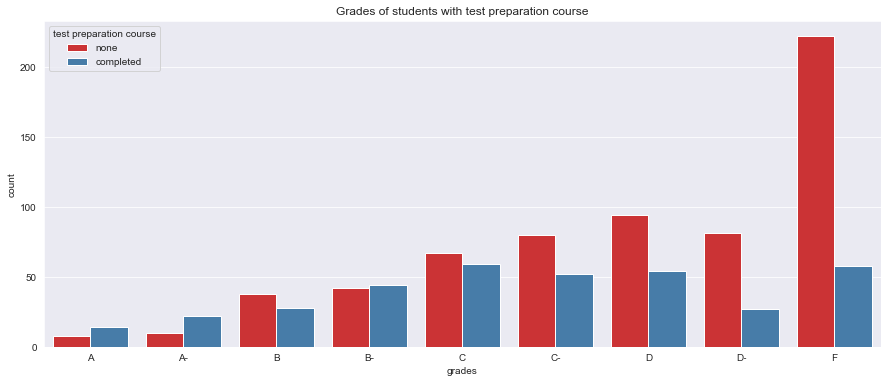

In [57]:
# How effective is the test preparation course?
# This graph displays the grades based on test preparation course.
# We can conclude from the graph that students who took test preparation course
# performed better in exams.

plt.figure(figsize=(15,6))
plt.title('Grades of students with test preparation course')
sns.countplot(df['grades'], hue=df['test preparation course'], palette='Set1')

In [12]:
# find total number of students based on grades (group by grades)
gradeList = []
gradeList = df.groupby(['grades']).size().reset_index(name='counts')
print(gradeList)
print("Total number of students :", sum(gradeList.counts))
# function to find the % of students on basis of grade
def updated(x): 
    return round((x*100)/1000,2)

percList = list(map(updated, gradeList.counts))
print(percList)

  grades  counts
0      A      22
1     A-      32
2      B      66
3     B-      86
4      C     126
5     C-     132
6      D     148
7     D-     108
8      F     280
Total number of students : 1000
[2.2, 3.2, 6.6, 8.6, 12.6, 13.2, 14.8, 10.8, 28.0]


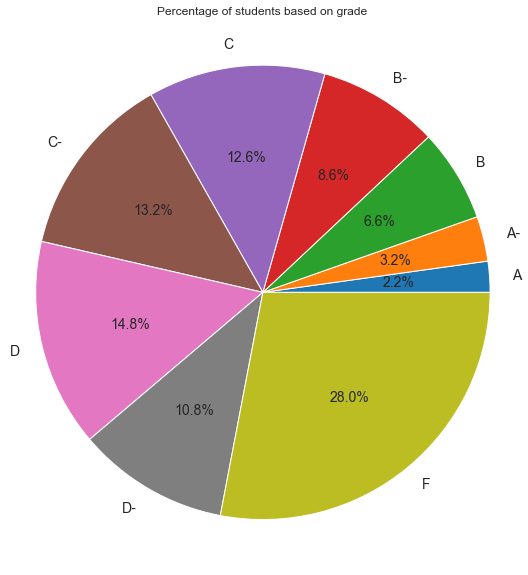

In [61]:
# Create a pie chart that shows % of students with their grades 
fig, ax1 = plt.subplots(figsize=(9, 10))
ax1.pie(percList,labels=gradeList['grades'], autopct='%1.1f%%',startangle=0,textprops={'fontsize': 14})
ax1.set(title="Percentage of students based on grade")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
# find total number of students based on grades and gender
gradeGenderList = df.groupby(['grades','gender']).size().reset_index(name='counts')
percGenderList = list(map(updated, gradeGenderList.counts))
print(percGenderList)
gradeGenderList["gender"]= gradeGenderList["gender"].replace("female", "F")
gradeGenderList["gender"]= gradeGenderList["gender"].replace("male", "M")
print(gradeGenderList)

[1.9, 0.3, 2.1, 1.1, 3.9, 2.7, 4.3, 4.3, 7.3, 5.3, 7.5, 5.7, 7.7, 7.1, 5.2, 5.6, 11.9, 16.1]
   grades gender  counts
0       A      F      19
1       A      M       3
2      A-      F      21
3      A-      M      11
4       B      F      39
5       B      M      27
6      B-      F      43
7      B-      M      43
8       C      F      73
9       C      M      53
10     C-      F      75
11     C-      M      57
12      D      F      77
13      D      M      71
14     D-      F      52
15     D-      M      56
16      F      F     119
17      F      M     161


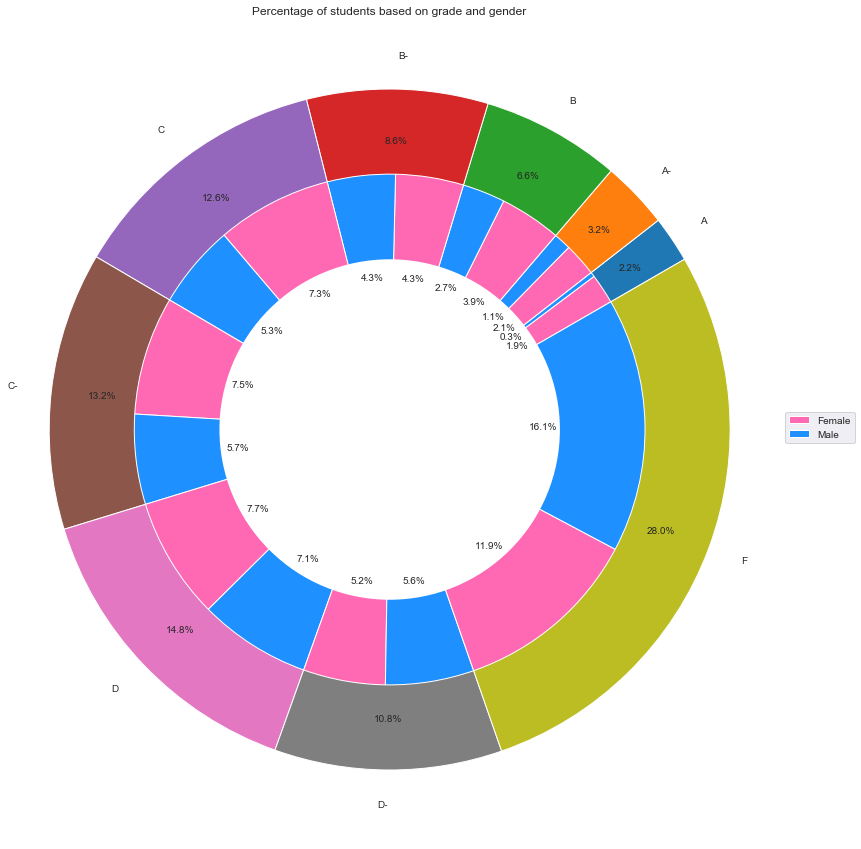

In [63]:
# Create a nested pie chart first showing % of students with their grades.
# Then, categorize the students based on gender
# Looking at the pie chart, I can conclude that females performed better in exams than males.
colors_gender = []
for gender in gradeGenderList["gender"]:
    if gender == "F":
        colors_gender.append('hotpink')
    else :
        colors_gender.append('dodgerblue')
fig, ax1 = plt.subplots(figsize=(12, 12))

plt.pie(percList,labels=gradeList['grades'], startangle=30,autopct='%1.1f%%',pctdistance=0.85,frame=True)
pie = plt.pie(percGenderList,colors=colors_gender,radius=0.75,autopct='%1.1f%%',labeldistance=1.20,startangle=30)

centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.set(title="Percentage of students based on grade and gender")


labels=["Female","Male"]
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
    
plt.axis('equal')
plt.tight_layout()
plt.show()

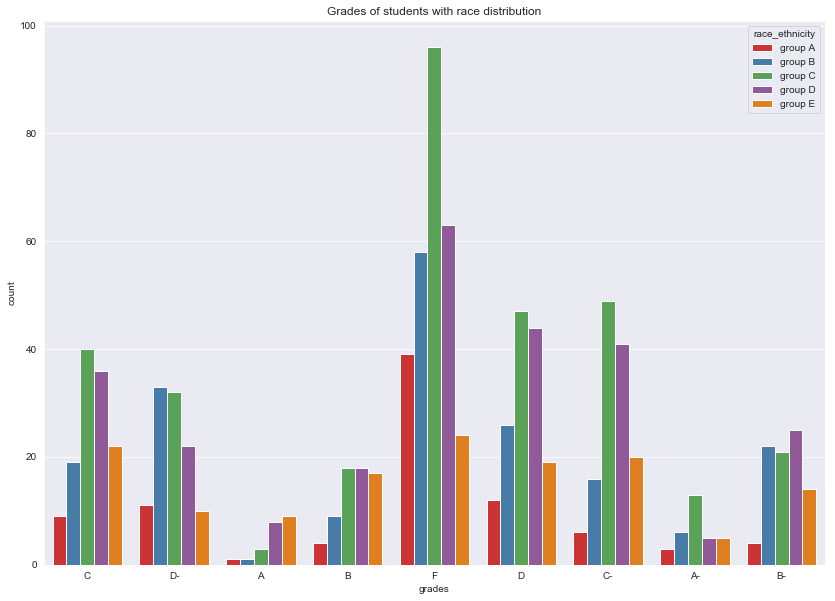

In [40]:
# This graph displays the grades based on race/ethnicity.
# We can conclude from the graph that Group E performed better than other groups. 
plt.figure(figsize=(14,10))
plt.title('Grades of students with race distribution')
df.sort_values("race_ethnicity", axis = 0, ascending = True, inplace=True,na_position ='last') 
sns.countplot(df['grades'], hue=df['race_ethnicity'], palette='Set1')

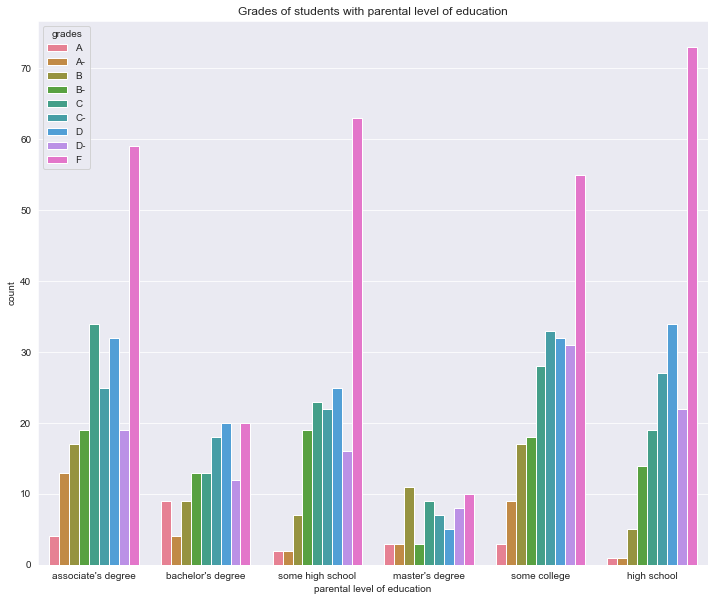

In [67]:
# This graph displays the grades based on parental level of education.
# We can conclude from the graph that students whose parents have strong education
# background performed better in exams.

plt.figure(figsize=(12,10))
plt.title('Grades of students with parental level of education')
df.sort_values("grades", axis = 0, ascending = True, inplace=True,na_position ='last')
sns.countplot(df['parental level of education'], hue = df['grades'], palette = 'husl')
plt.show()

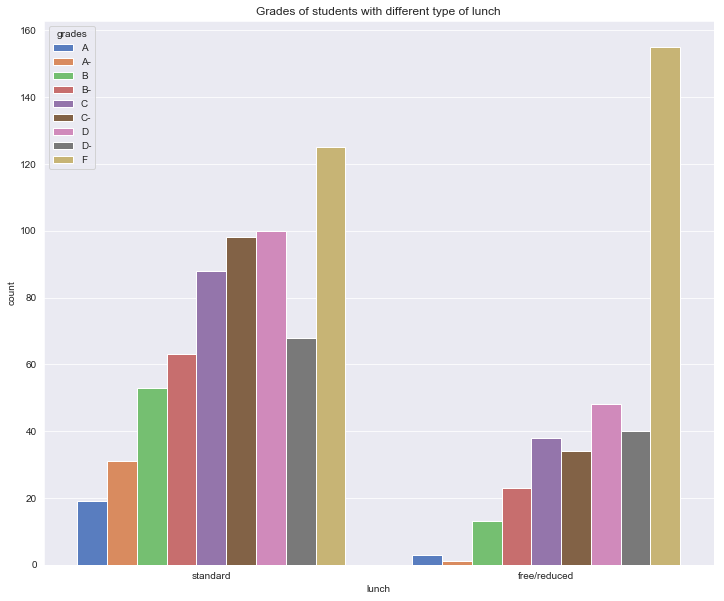

In [52]:
# This graph displays the grades based on type of lunch ate.
# Students who ate free/reduced lunch are from poor economic background.
# We can conclude from the graph that students from strong economic 
# background performed better in exams.

plt.figure(figsize=(12,10))
plt.title('Grades of students with type of lunch')
df.sort_values("grades", axis = 0, ascending = True, inplace=True,na_position ='last')
sns.countplot(df['lunch'], hue = df['grades'], palette = 'muted')
plt.show()

In [ ]:
# Which major factors contribute to test outcomes?
# 1. Females performed better in exams than Males
# 2. Students who took test preparation course
# 3. Group E performed better compared to the other groups
# 4. Students whose parents have strong education background
# 5. Students who are from strong economic background. 
#    Economic background can significantly affect a student's academic performance

In [ ]:
# What would be the best way to improve student scores on each test?
# Students should take test preparation course and eat standard lunch.